In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer

Part 1, loading the dataset 

In [26]:
data_new = pd.read_csv('auto-mpg.csv')
data_new.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Part 2, splitting the data into triaining and testing dataset 

In [29]:
train_data, test_data = train_test_split(data_new, test_size=0.25, random_state=42)
train_data.shape, test_data.shape

((298, 9), (100, 9))

Part 3, visualization

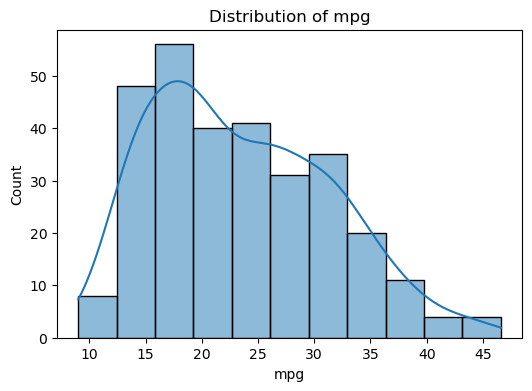

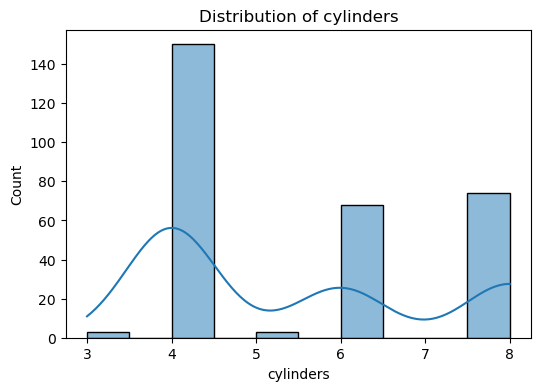

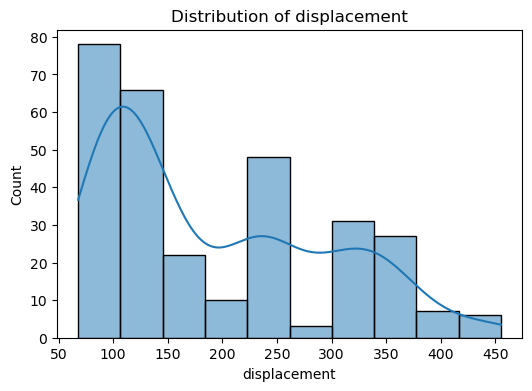

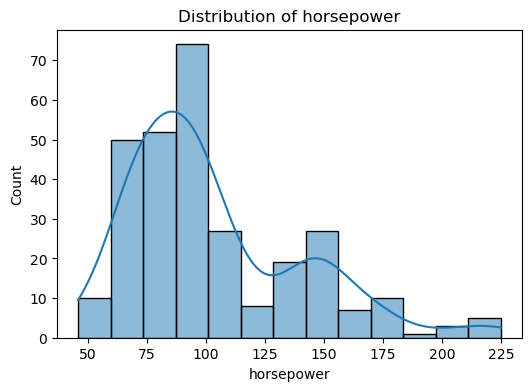

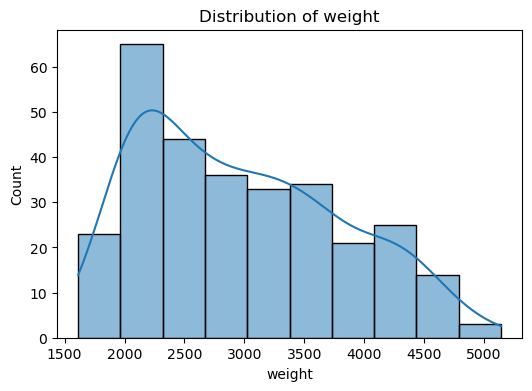

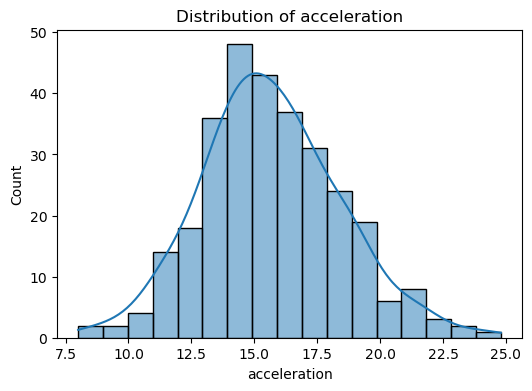

['car name']

In [32]:
# The numeric columns to determine symmetry or skewness
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

# Histograms to visualize distribution
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# The categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols

1. Numeric and Symmetric Distributions:
   - acceleration
2. Numeric and Skewed Distributions
   - mpg
   - cylinders
   - displacement
   - horsepower
   - weight
3. Categorical Column
   - car name

Part 4, building pipelines 

In [36]:
# Columns based on the visualizations done
symmetric_cols = ['acceleration']
skewed_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']
categorical_cols = ['car name']

# Log transformation for skewed data
log_transformer = FunctionTransformer(np.log1p, validate=True)

# Imputation -> Standardization
symmetric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Imputation -> Log transformation -> Standardization
skewed_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', log_transformer),
    ('scaler', StandardScaler())
])

# One hot encoding
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Full pipeline
full_pipeline = ColumnTransformer([
    ('sym', symmetric_pipeline, symmetric_cols),
    ('skew', skewed_pipeline, skewed_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

Part 5, training the pipeline on the training data, performing transformation on the training and testing data

In [39]:
full_pipeline.fit(train_data)

train_prepared = full_pipeline.transform(train_data)
test_prepared = full_pipeline.transform(test_data)

Part 6, the shape of the processed training data and processed testing data

In [42]:
print("Processed training data shape:", train_prepared.shape)
print("Processed testing data shape:", test_prepared.shape)

Processed training data shape: (298, 238)
Processed testing data shape: (100, 238)
